# Load the data 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("students.csv")

# Basic data analysis

# 1.Average Scores

In [14]:
print("Math:", df["math score"].mean())
print("Reading:", df["reading score"].mean())
print("Writing:", df["writing score"].mean())


Math: 67.24225865209472
Reading: 70.42987249544626
Writing: 69.18943533697632


# 2. Score Range per Subject

In [15]:
df[["math score", "reading score", "writing score"]].describe()

,math score,reading score,writing score
count,549.000000,549.000000,549.000000
mean,67.242259,70.429872,69.189435
std,15.164835,14.064019,15.114303
min,20.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,67.000000,71.000000,70.000000
75%,78.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


# 3. Group Averages by Education Level

In [16]:
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,69.243243,72.711712,72.369369
bachelor's degree,69.779661,71.881356,72.101695
high school,66.025000,70.066667,67.583333
master's degree,69.145833,70.770833,70.229167
some college,67.629310,70.034483,68.370690
some high school,63.431579,67.631579,66.168421


# 4.Correlation with Test Preparation

In [17]:
df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.436170,74.420213,75.739362
none,66.099723,68.351801,65.778393


# 5.Gender-Based Score Breakdown

In [18]:
df.groupby("gender")[["math score", "reading score", "writing score"]].mean().round(1)

,math score,reading score,writing score
gender,,,
female,64.0,72.8,72.9
male,70.8,67.8,65.1


# Bar Chart – Average Scores by Gender

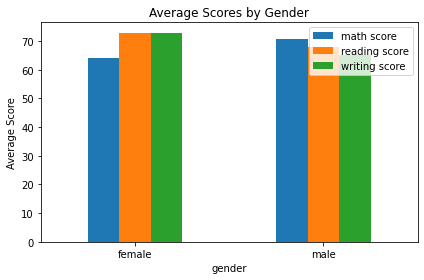

In [19]:
df.groupby("gender")[["math score", "reading score", "writing score"]].mean().plot.bar()
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 # Scatter Plot – Math Score vs Writing Score

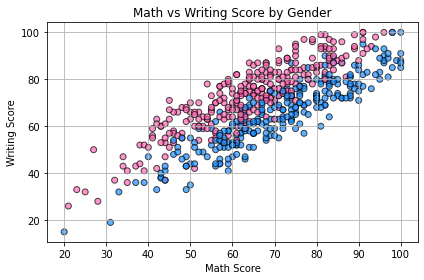

In [22]:
import matplotlib.pyplot as plt


colors = {"female": "hotpink", "male": "dodgerblue"}


valid_gender = df["gender"].isin(colors.keys())
df_filtered = df[valid_gender].copy()


point_colors = df_filtered["gender"].map(colors)


plt.scatter(
    df_filtered["math score"],
    df_filtered["writing score"],
    c=point_colors,
    alpha=0.7,
    edgecolors="k"
)
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.title("Math vs Writing Score by Gender")
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter Plot – Reading vs Writing Score

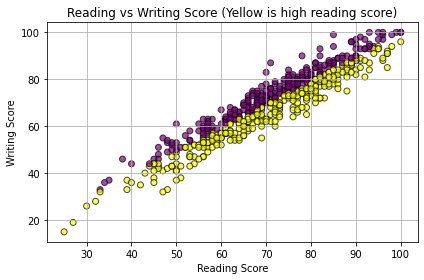

In [26]:
import matplotlib.pyplot as plt

# Define colors based on condition
colors = df["reading score"] > df["writing score"]
color_map = colors.map({True: "yellow", False: "purple"})

# Scatter plot
plt.scatter(
    df["reading score"],
    df["writing score"],
    c=color_map,
    alpha=0.7,
    edgecolors="k"
)
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Reading vs Writing Score (Yellow is high reading score)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Heat Map Correlation based

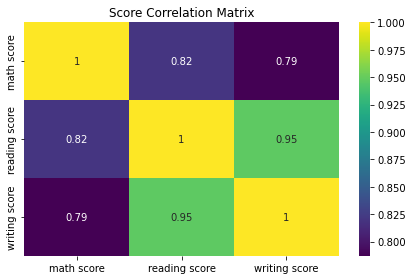

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include="number")
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title("Score Correlation Matrix")
plt.tight_layout()
plt.show()


# Score Distribution Heatmap

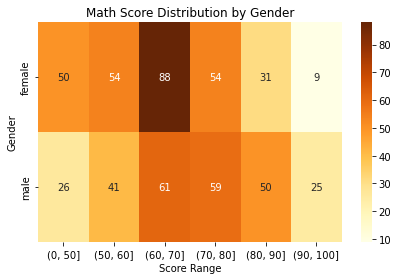

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bin scores
df["math_bin"] = pd.cut(df["math score"], bins=[0, 50, 60, 70, 80, 90, 100])
gender_math_counts = pd.crosstab(df["gender"], df["math_bin"])

sns.heatmap(gender_math_counts, annot=True, cmap="YlOrBr")
plt.title("Math Score Distribution by Gender")
plt.xlabel("Score Range")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()
